## Market Basket Analysis

In [1]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.model_selection import KFold
#from sklearn.metrics import mean_squared_error

import datetime

import csv
#import scikit as sci

In [2]:
# Import `os` 
import os

# Retrieve current working directory (`cwd`)
cwd = os.getcwd()
cwd

# Change directory 
os.chdir("/Users/urifeld/Desktop/Market_Basket_Project")

# List all files and directories in current directory
os.listdir('.')

['Main.ipynb',
 'Services_Provisioned_pre_and_post_Paygo_conversion_V2.xlsx',
 '3-Explore-elec.ipynb',
 '.ipynb_checkpoints']

In [3]:
file = 'Services_Provisioned_pre_and_post_PayGo_conversion_V2.xlsx'

In [4]:
# Load spreadsheet
xl = pd.ExcelFile(file)

# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('Sheet1')

#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

df1.head()

for c in df1:
    print(c, df1[c].dtype)

for c in df1:
    print('% 25s' % c, '% 5d' % df1[c].nunique(), df1[c].unique()[:3])

ACCOUNT_ID object
TRIAL_ACTIVATION_TIMESTAMP object
PAYG_CONVERSION_TIMESTAMP object
COMPANY object
SERVICES_CREATED_BEFORE_CONVERSION object
SERVICES_CREATED_POST_CONVERSION object
SERVICES_CREATED object
TRIAL_ACTIVATION_DATE object
PAYG_CONVERSION_DATE object
Days_To_Conversion int64
Days_From_Activation int64
Days_From_Conversion int64
               ACCOUNT_ID  50049 ['3ef832a4e6f2e0e2dd7f33ec885f5efb' '573977aedf4261e75ee45b4ac85cb8f1'
 '6b3b76507a76097f4a17c268b363d5d3']
TRIAL_ACTIVATION_TIMESTAMP  50047 ['2015-09-15-19.49.32.115000' '2015-11-19-22.18.10.796000'
 '2017-08-22-21.00.26.500000']
PAYG_CONVERSION_TIMESTAMP  50032 ['2015-11-03-21.15.27.000000' '2018-06-04-18.25.47.000000'
 '2017-09-26-12.52.17.731000']
                  COMPANY  47397 ['BCBSMN- Inc.' "Alexander Peter's Account" "Nkau Jr Kgasane's Account"]
SERVICES_CREATED_BEFORE_CONVERSION  6402 ['Question_and_Answer' 'Cloudant_NoSQL_DB,Internet_of_Things_Platform'
 'Conversation']
SERVICES_CREATED_POST_CONVERSION  1

In [6]:
#Changed Object list to list for'SERVICES_CREATED'

f_tolist = lambda x: str(x).split(',') if len(str(x)) > 0 else None
df1.loc[:, 'SERVICES_CREATED'] = df1.loc[:, 'SERVICES_CREATED'].apply(f_tolist)

#print(df1['SERVICES_CREATED'][0])

#f_todate = lambda x: (x).split(',') if len(str(x)) > 0 else None
#df1.loc[:, 'SERVICES_CREATED'] = df1.loc[:, 'SERVICES_CREATED'].apply(f_tolist)




In [7]:
#count = 0
#for i in df1['SERVICES_CREATED']:
#    if df1['SERVICES_CREATED'][count] != ['nan']:
#        print (df1['SERVICES_CREATED'][count])
#    count += 1

service_list = []
count = 0
for i in df1['SERVICES_CREATED']:
    if df1['SERVICES_CREATED'][count] != ['nan']:
        service_list.append(df1['SERVICES_CREATED'][count])
    count += 1





In [10]:
print(service_list[:10])
print(len(service_list))

[['Question_and_Answer'], ['Cloudant_NoSQL_DB', 'Internet_of_Things_Platform'], ['Conversation'], ['API_Management', 'postgresql'], ['AlchemyAPI', 'Availability_Monitoring', 'ClearDB_MySQL_Database', 'Cloudant_NoSQL_DB', 'Object_Storage_(v3)'], ['Speech_To_Text'], ['Speech_To_Text'], ['Cloudant_NoSQL_DB', 'Visual_Recognition'], ['AlchemyAPI'], ['App_ID', 'Cloudant_NoSQL_DB', 'IBM_Push_Notifications', 'Personality_Insights', 'Question_and_Answer', 'RapidApps']]
37913


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

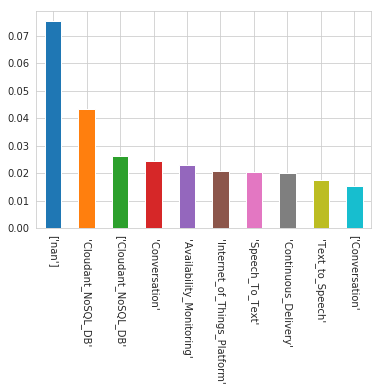

In [9]:
item_counts = {}
for iset in service_list:
    for item in iset:
        item_counts.setdefault(item, 0)
        item_counts[item] += 1
item_counts = pd.Series(item_counts)
item_props = item_counts.apply(lambda x: x/item_counts.sum())
item_props.sort_values(ascending=False, inplace=True)
item_props[:10].plot.bar(rot=-90);
#print(item_props[:10])

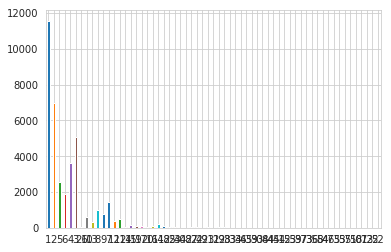

In [20]:
set_counts = {}
for iset in service_list:
    n = len(iset)
    set_counts.setdefault(n, 0)
    set_counts[n] += 1
set_counts = pd.Series(set_counts)
set_counts.plot.bar(rot=0);

In [10]:
def support(iset, itemsets):
    """ Compute support for given itemset

        iset : frozen itemset
    """
    # number of itemsets containing iset
    n = np.sum([1 for items in itemsets if iset.issubset(items)])
    supp = n / len(itemsets)  # support
    
    print(',', end='')
    return supp
print('done')

done


In [11]:
def apriori(sets, items, q):
    """ Perform a-priori on extracted itemsets

        Returns : dict with {frozenset : support}
    """
    from itertools import combinations
    
    # store frequent sets w/ support vals
    supp_d = dict()
    supp_temp = dict()
    set_max = np.max([len(s) for s in sets])
    print('set_max: {}'.format(set_max))

    # iterate through all possible set sizes
    for i in range(1, set_max):
        if i == 1:
            # init itemsets to retain, starting with
            # unique items (size 1)
            unique = set(items)
        else:
            # copy unique items from size i-1 frequent sets
            # (to work from)
            unique = frequent.copy()
        
        # end loop if not enough items to form size i sets
        if len(unique) < i:
            break
            
        # null set to store unique items from size i frequent sets
        frequent = set()
        
        # create all possible size i itemsets using
        # items in unique
        itemsets = combinations(unique, i)
        
        # compute and store support vals for current itemsets
        supp_temp = dict()
        for s in itemsets:
            supp = support(set(s), sets)
            supp_temp[frozenset(s)] = supp
        
        # set min support using percentile
        minsup = np.percentile(list(supp_temp.values()), q)
        # fill frequent set with items in current itemsets with sup >= minsup
        # and add each frequent itemset to supp_d w/ support value
        for iset, sup in supp_temp.items():
            if sup >= minsup:
                supp_d[iset] = sup
                # update ignores items from k that are already in frequent
                frequent.update(iset)
    print('.', end='')
    return supp_d
print('done')

done


In [13]:
def gen_rules(sets, items, q, min_conf):
    """ Generate association rules

        sets : list of frozen itemsets
        items : list of unique items
        q : percentile [0, 100] used to determine threshold 
            (minimum support to retain subsets)
            q=90 will set threshold to 90th percentile of support values
        min_conf : minimum confidence level required to keep a rule

        Returns : DataFrame and dict, each containing associon rules
            and respective metrics (support, confidence, lift)
    """
    from itertools import combinations

    supp_d = apriori(sets, items, q)
    
    # generate antecedent/consequent pairs
    antc_cnsq = []
    for k in supp_d.keys():
        if len(k) < 2:
            continue
        for i in range(1, len(k)):
            combs = combinations(k, i)
            # create and save antc/cnsq combinations
            antc_cnsq.append([(set(c), set(k) - set(c)) for c in combs])

    # iterate pairs and compute conf and lift
    # and save rules
    rules_dict = dict()
    rules_df = dict()
    i = 0
    for l in antc_cnsq:
        for pair in l:
            a = pair[0]
            c = pair[1]
            z = a.union(c)
            rule = '{} -> {}'.format(a, c)
            try:
                supp = supp_d[frozenset(z)]
                conf = supp / supp_d[frozenset(a)]
                lift = conf / supp_d[frozenset(c)]
            except Exception:
                continue
            
            if conf > min_conf:
                rules_dict[rule] = {'supp': supp, 'conf': conf, 'lift': lift}
                rules_df[i] = {'antec': a, 
                               'consq': c, 
                               'supp': supp, 
                               'conf': conf, 
                               'lift': lift}
                i += 1
                
    n_rules = len(rules_df)
    if n_rules > 0:          
        rules_df = DF(rules_df).T[['antec','consq','supp','conf','lift']]
        print('Rules Generated: {}'.format(n_rules))
    else:
        print('No rules generated!')

    return rules_dict, rules_df
    print('done')
print('done')

done


In [14]:
# create a set of our unique items: {A, B, C, D, E}
items = set([i for iset in service_list for i in iset])
# generate rules using 25th percentile for min support and a min conf of 0.4
rules_dict, rules_df = gen_rules(service_list, items, 25, 0.4)
print('done')

set_max: 81
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
don

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


KeyboardInterrupt: 

In [ ]:
rules_df

In [ ]:
# dataframe view of dict
print(DF(rules_dict).T)

In [ ]:
temp = rules_df.copy()
temp['antec'] = rules_df['antec'].apply(lambda x: str(x)).astype('category').cat.codes
temp['consq'] = rules_df['consq'].apply(lambda x: str(x)).astype('category').cat.codes
temp

In [ ]:
fig = plt.figure(figsize=(14,10))
s = list(temp['supp'].values*3e3)
c = list(temp['lift'].values)
ax = plt.scatter(temp['antec'], temp['consq'], s=s, c=c, cmap='viridis')


In [ ]:
for i, sup in enumerate(temp.supp):
    plt.annotate(round(sup, 3), (temp.antec[i] + 0.1, temp.consq[i] + 0.1))
plt.colorbar(ax)

In [ ]:
# get proper order of labels for axes
ant_idx = temp.antec.sort_values().drop_duplicates().index
cns_idx = temp.consq.sort_values().drop_duplicates().index
# set tick labels
plt.xticks(np.arange(8), rules_df.antec.loc[ant_idx], rotation=90)
plt.yticks(np.arange(4), rules_df.consq.loc[cns_idx])
plt.xlabel('Antecedent')
plt.ylabel('Consequent');